In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator
from PIL import Image
import json
import numpy as np

In [49]:
filename = "./src/larsen_coordinates.json"
with open(filename) as f:
    data = json.load(f)

# boundary_coordinates = np.column_stack(
#     (data["x"], data["y"])
# )  # Shift to positive domain

boundary_coordinates = data

thickness_image_path = "./src/larsen_thickness_map.png"
thickness_image = Image.open(thickness_image_path).convert("L")  # Convert to grayscale
thickness_array = np.array(thickness_image)
thickness_array = thickness_array / 255  # Normalize to 0-1
thickness_array = np.flip(thickness_array, axis=0)  # Flip vertically
thickness_array = 1 / thickness_array  # Invert values

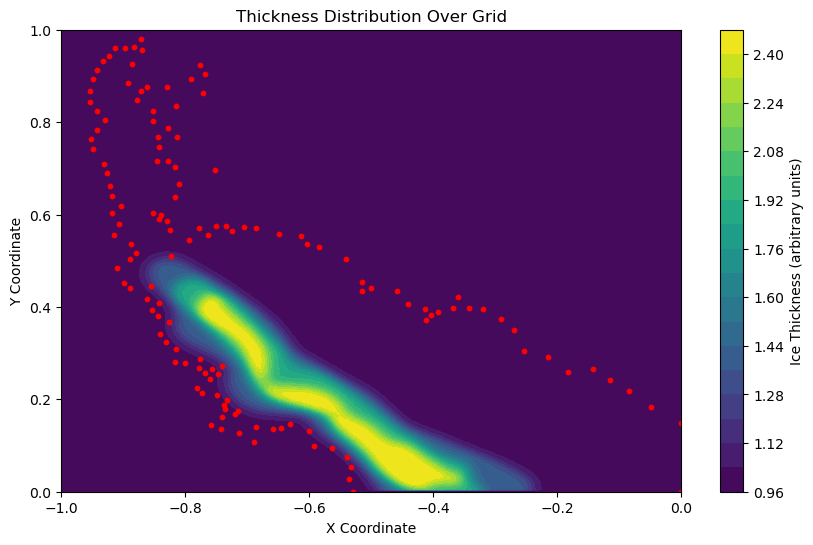

In [50]:

# Create grid for thickness map (normalized to [-1.2, 0] x [0, 1])
image_resolution = thickness_array.shape
x_grid = np.linspace(-1, 0, image_resolution[1])  # Match land geometry x domain
y_grid = np.linspace(0, 1, image_resolution[0])  # Match land geometry y domain
X, Y = np.meshgrid(x_grid, y_grid)  # Create grid for plotting

# Plot the thickness map directly
plt.figure(figsize=(10, 6))

contour = plt.contourf(X, Y, thickness_array, levels=20, cmap="viridis")  # Contour plot
plt.scatter(
    boundary_coordinates["x"], boundary_coordinates["y"], color="red", s=10, label="Points"
)
plt.colorbar(contour, label="Ice Thickness (arbitrary units)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Thickness Distribution Over Grid")
plt.show()